In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
df = pd.read_csv('../data/global_prevalence_of_HIV_dataset.csv')

print(df.head())
print(df.info())

      indicatorId geoUnit  year  value  qualifier  magnitude
0  SH.DYN.AIDS.ZS     AFG  2000    0.1        NaN        NaN
1  SH.DYN.AIDS.ZS     AFG  2001    0.1        NaN        NaN
2  SH.DYN.AIDS.ZS     AFG  2002    0.1        NaN        NaN
3  SH.DYN.AIDS.ZS     AFG  2003    0.1        NaN        NaN
4  SH.DYN.AIDS.ZS     AFG  2004    0.1        NaN        NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3351 entries, 0 to 3350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   indicatorId  3351 non-null   object 
 1   geoUnit      3351 non-null   object 
 2   year         3351 non-null   int64  
 3   value        3351 non-null   float64
 4   qualifier    0 non-null      float64
 5   magnitude    0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 157.2+ KB
None


In [251]:
# To delete unused columns
df = df.drop(columns=["qualifier", "magnitude"])

In [252]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 indicatorId    0
geoUnit        0
year           0
value          0
dtype: int64


In [253]:
continent_mapping = {
    'AFG': 'Asia', 'AGO': 'Africa', 'ALB': 'Europe', 'ARE': 'Asia', 'ARG': 'South America',
    'ARM': 'Asia', 'AUS': 'Oceania', 'AZE': 'Asia', 'BDI': 'Africa', 'BEL': 'Europe',
    'BEN': 'Africa', 'BFA': 'Africa', 'BGD': 'Asia', 'BGR': 'Europe', 'BHS': 'North America',
    'BLR': 'Europe', 'BLZ': 'North America', 'BOL': 'South America', 'BRA': 'South America',
    'BRB': 'North America', 'BTN': 'Asia', 'BWA': 'Africa', 'CAF': 'Africa', 'CAN': 'North America',
    'CHE': 'Europe', 'CHL': 'South America', 'CIV': 'Africa', 'CMR': 'Africa', 'COD': 'Africa',
    'COG': 'Africa', 'COL': 'South America', 'COM': 'Africa', 'CPV': 'Africa', 'CRI': 'North America',
    'CUB': 'North America', 'CYP': 'Asia', 'CZE': 'Europe', 'DEU': 'Europe', 'DNK': 'Europe',
    'DOM': 'North America', 'DZA': 'Africa', 'ECU': 'South America', 'EGY': 'Africa', 'ERI': 'Africa',
    'ESP': 'Europe', 'EST': 'Europe', 'ETH': 'Africa', 'FJI': 'Oceania', 'FRA': 'Europe',
    'GAB': 'Africa', 'GEO': 'Asia', 'GHA': 'Africa', 'GIN': 'Africa', 'GMB': 'Africa',
    'GNB': 'Africa', 'GNQ': 'Africa', 'GRC': 'Europe', 'GTM': 'North America', 'GUY': 'South America',
    'HND': 'North America', 'HRV': 'Europe', 'HTI': 'North America', 'IDN': 'Asia', 'IND': 'Asia',
    'IRL': 'Europe', 'IRN': 'Asia', 'IRQ': 'Asia', 'ISL': 'Europe', 'ITA': 'Europe',
    'JAM': 'North America', 'JOR': 'Asia', 'KEN': 'Africa', 'KGZ': 'Asia', 'KHM': 'Asia',
    'KWT': 'Asia', 'LAO': 'Asia', 'LBN': 'Asia', 'LBR': 'Africa', 'LBY': 'Africa',
    'LKA': 'Asia', 'LSO': 'Africa', 'LTU': 'Europe', 'LUX': 'Europe', 'LVA': 'Europe',
    'MAR': 'Africa', 'MDA': 'Europe', 'MDG': 'Africa', 'MDV': 'Asia', 'MEX': 'North America',
    'MKD': 'Europe', 'MLI': 'Africa', 'MLT': 'Europe', 'MMR': 'Asia', 'MNE': 'Europe',
    'MNG': 'Asia', 'MOZ': 'Africa', 'MRT': 'Africa', 'MWI': 'Africa', 'MYS': 'Asia',
    'NAM': 'Africa', 'NER': 'Africa', 'NIC': 'North America', 'NLD': 'Europe', 'NPL': 'Asia',
    'NZL': 'Oceania', 'OMN': 'Asia', 'PAK': 'Asia', 'PAN': 'North America', 'PER': 'South America',
    'PHL': 'Asia', 'PNG': 'Oceania', 'POL': 'Europe', 'PRT': 'Europe'
}

In [254]:
df["continent"] = df["geoUnit"].map(continent_mapping)

In [255]:
#the mean HIV prevalence across all countries and years.
global_avg_prevalence = df["value"].mean()
print(f"Global Average HIV Prevalence (2000-2022): {global_avg_prevalence:.2f}%")

Global Average HIV Prevalence (2000-2022): 1.85%


In [256]:
#how HIV prevalence differs between geographic regions.
avg_prevalence_by_geo = df.groupby("geoUnit")["value"].mean()
print(avg_prevalence_by_geo.head())

geoUnit
AFG    0.100000
AGO    1.700000
ALB    0.100000
ARE    0.100000
ARG    0.378261
Name: value, dtype: float64


In [257]:
#the top 10 regions with the highest HIV prevalence in 2022.
top_geo_2022 = df[df["year"] == 2022].nlargest(10, "value")[["geoUnit", "value"]]
print(top_geo_2022)

     geoUnit  value
2947     SWZ   25.9
1845     LSO   19.3
3304     ZAF   17.8
504      BWA   16.4
2190     MOZ   11.6
2282     NAM   11.0
3350     ZWE   11.0
3327     ZMB   10.8
2236     MWI    7.1
1271     GNQ    6.7


In [258]:
# Count of GeoUnits with Prevalence > 5%
high_prevalence_count = len(df[df["value"] > 5]["geoUnit"].unique())
print(f"GeoUnits with Prevalence > 5%: {high_prevalence_count}")

GeoUnits with Prevalence > 5%: 16


In [259]:
#the year with the highest global average prevalence.
top_year_by_prevalence = df.groupby("year")["value"].mean().idxmax()
print(f"Year with Highest Average Prevalence: {top_year_by_prevalence}")

Year with Highest Average Prevalence: 2000


In [260]:
#average prevalence per year for the last 10 years.
recent_prevalence = df[df["year"] >= 2012].groupby("year")["value"].mean()
print(recent_prevalence)

year
2012    1.852381
2013    1.845578
2014    1.831973
2015    1.808163
2016    1.786395
2017    1.757143
2018    1.725170
2019    1.686395
2020    1.649660
2021    1.610959
2022    1.642754
Name: value, dtype: float64


In [261]:
#how many unique regions had HIV data in the year 2000.
geo_count_2000 = len(df[df["year"] == 2000]["geoUnit"].unique())
print(f"GeoUnits with Prevalence in 2000: {geo_count_2000}")

GeoUnits with Prevalence in 2000: 145


In [262]:
#average HIV prevalence for each decade.
df["Decade"] = (df["year"] // 10) * 10
avg_prevalence_by_decade = df.groupby("Decade")["value"].mean()
print(avg_prevalence_by_decade)

Decade
2000    1.964207
2010    1.801293
2020    1.634339
Name: value, dtype: float64


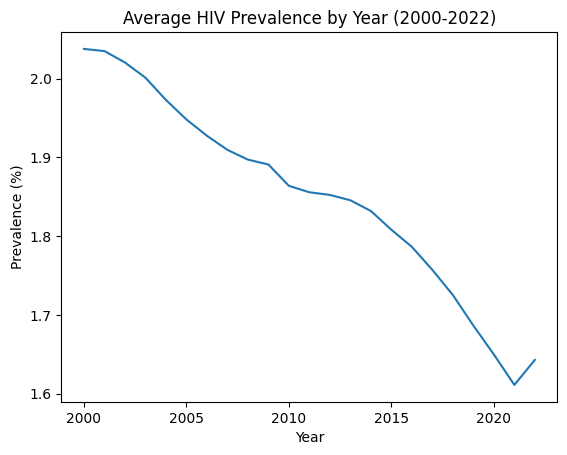

In [263]:
df.groupby("year")["value"].mean().plot(kind="line")
plt.title("Average HIV Prevalence by Year (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.show()

In [264]:
#Top 10 GeoUnits with Highest Average in 2000s
prevalence_2000s = df[(df["year"] >= 2000) & (df["year"] < 2010)].groupby("geoUnit")["value"].mean().nlargest(10)
print(prevalence_2000s)

geoUnit
SWZ    26.29
BWA    23.85
LSO    23.07
ZWE    18.77
ZAF    15.43
ZMB    13.95
NAM    13.68
MWI    12.44
MOZ    10.44
KEN     6.96
Name: value, dtype: float64


In [265]:
# Percentage of GeoUnits with >1% Prevalence in 2020
pct_high_2020 = len(df[(df["year"] == 2020) & (df["value"] > 1)]) / len(df[df["year"] == 2020]) * 100
print(f"Percentage of GeoUnits with Prevalence > 1% in 2020: {pct_high_2020:.2f}%")

Percentage of GeoUnits with Prevalence > 1% in 2020: 24.49%


In [266]:
# HIV Prevalence in Africa (based on geoUnit codes)
africa_prevalence = df[df["geoUnit"].str.contains("AF")].groupby("year")["value"].mean()
print(africa_prevalence.head())

year
2000    6.900000
2001    7.066667
2002    7.200000
2003    7.266667
2004    7.300000
Name: value, dtype: float64


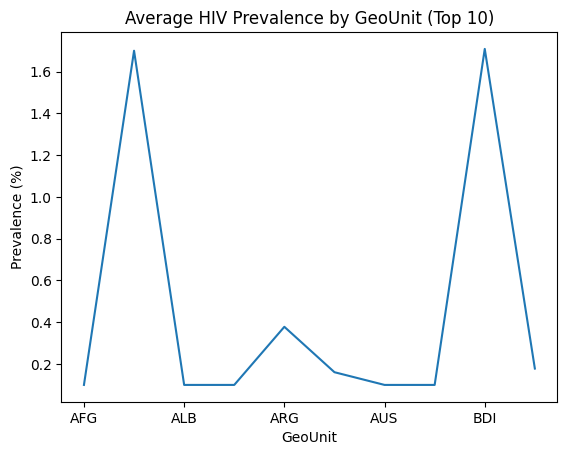

In [267]:
df.groupby("geoUnit")["value"].mean().head(10).plot(kind="line")
plt.title("Average HIV Prevalence by GeoUnit (Top 10)")
plt.xlabel("GeoUnit")
plt.ylabel("Prevalence (%)")
plt.show()

In [268]:
# Count of GeoUnits Reporting Prevalence in 21st Century
century_geo_count = len(df[df["year"] >= 2000]["geoUnit"].unique())
print(f"GeoUnits with Prevalence in 21st Century: {century_geo_count}")

GeoUnits with Prevalence in 21st Century: 147


In [269]:
#Top 5 Years with Highest Average in 2000s
top_2000s = df[(df["year"] >= 2000) & (df["year"] < 2010)].groupby("year")["value"].mean().nlargest(5)
print(top_2000s)

year
2000    2.037931
2001    2.035172
2002    2.020690
2003    2.001379
2004    1.973103
Name: value, dtype: float64


In [270]:
#average prevalence per region for the year 2022.
prevalence_2022 = df[df["year"] == 2022].groupby("geoUnit")["value"].mean()
print(prevalence_2022.head())

geoUnit
AFG    0.1
AGO    1.5
ALB    0.1
ARE    0.1
ARG    0.4
Name: value, dtype: float64


In [271]:
# Average Prevalence in High-Burden Regions (>2%)
high_prevalence_avg = df[df["value"] > 2].groupby("geoUnit")["value"].mean()
print(high_prevalence_avg.head())

geoUnit
BDI     2.666667
BWA    21.691304
CAF     4.960870
CIV     3.852381
CMR     4.021739
Name: value, dtype: float64


In [272]:
#Number of GeoUnits > 0.5% Prevalence in 2010
high_prevalence_2010 = len(df[(df["year"] == 2010) & (df["value"] > 0.5)])
print(f"GeoUnits with Prevalence > 0.5% in 2010: {high_prevalence_2010}")

GeoUnits with Prevalence > 0.5% in 2010: 57


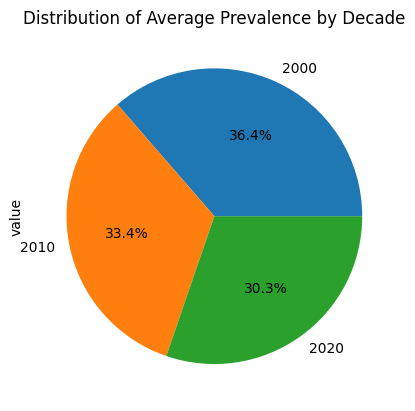

In [273]:
df["Decade"] = (df["year"] // 10) * 10
df.groupby("Decade")["value"].mean().plot(kind="pie", autopct='%1.1f%%')
plt.title("Distribution of Average Prevalence by Decade")
plt.show()

In [274]:
#Average Prevalence in Latin America (Assumed based on codes)
latam_prevalence = df[df["geoUnit"].str.contains("AM")].groupby("year")["value"].mean()
print(latam_prevalence.head())

year
2000    7.65
2001    7.75
2002    7.80
2003    7.75
2004    7.65
Name: value, dtype: float64


In [275]:
#Average prevalence per region since 2020.
prevalence_2020s = df[df["year"] >= 2020].groupby("geoUnit")["value"].mean()
print(prevalence_2020s.head())

geoUnit
AFG    0.100000
AGO    1.533333
ALB    0.100000
ARE    0.100000
ARG    0.400000
Name: value, dtype: float64


In [276]:
#GeoUnits with Prevalence in 2000s
geo_count_2000s = len(df[(df["year"] >= 2000) & (df["year"] < 2010)]["geoUnit"].unique())
print(f"GeoUnits with Prevalence in 2000s: {geo_count_2000s}")

GeoUnits with Prevalence in 2000s: 145


In [277]:
#Top 10 GeoUnits with Largest Prevalence Increase (2000-2020)
prevalence_2000 = df[df["year"] == 2000].set_index("geoUnit")["value"]
prevalence_2020 = df[df["year"] == 2020].set_index("geoUnit")["value"]
diff_prevalence = (prevalence_2020 - prevalence_2000).nlargest(10)
print(diff_prevalence)

geoUnit
ZAF    5.5
MOZ    3.5
SWZ    3.0
GNQ    2.9
GUY    0.9
EST    0.6
CUB    0.5
MDA    0.5
PNG    0.5
CRI    0.4
Name: value, dtype: float64


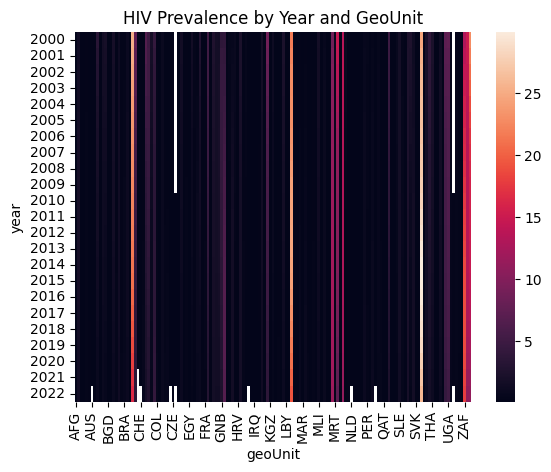

In [278]:
pivot = df.pivot_table(values="value", index="year", columns="geoUnit", aggfunc="mean")
sns.heatmap(pivot)
plt.title("HIV Prevalence by Year and GeoUnit")
plt.show()

In [279]:
#average HIV prevalence for each continent from 2000 to 2022
avg_prevalence_by_continent = df.groupby("continent")["value"].mean()
print("Average HIV Prevalence by Continent (2000-2022):")
print(avg_prevalence_by_continent)

Average HIV Prevalence by Continent (2000-2022):
continent
Africa           3.975064
Asia             0.202581
Europe           0.224871
North America    0.812500
Oceania          0.271429
South America    0.492935
Name: value, dtype: float64


In [280]:
#the highest HIV prevalence value recorded in 2022 for each continent
max_prevalence_2022 = df[df["year"] == 2022].groupby("continent")["value"].max()
print("\nHighest Prevalence by Continent in 2022:")
print(max_prevalence_2022)


Highest Prevalence by Continent in 2022:
continent
Africa           19.3
Asia              0.9
Europe            0.9
North America     1.7
Oceania           1.0
South America     1.5
Name: value, dtype: float64


In [281]:
#average annual HIV prevalence per continent (used later for time series plot)
avg_prevalence_by_year_continent = df.groupby(["year", "continent"])["value"].mean().unstack()
print("\nAverage Annual Prevalence by Continent:")
print(avg_prevalence_by_year_continent)


Average Annual Prevalence by Continent:
continent    Africa      Asia    Europe  North America   Oceania  \
year                                                               
2000       4.570588  0.192593  0.156000       0.864286  0.175000   
2001       4.558824  0.192593  0.160000       0.864286  0.200000   
2002       4.517647  0.192593  0.180000       0.842857  0.200000   
2003       4.452941  0.196296  0.184000       0.842857  0.225000   
2004       4.367647  0.203704  0.188000       0.842857  0.225000   
2005       4.291176  0.196296  0.196000       0.835714  0.250000   
2006       4.220588  0.196296  0.204000       0.835714  0.250000   
2007       4.170588  0.196296  0.212000       0.821429  0.250000   
2008       4.126471  0.196296  0.216000       0.814286  0.250000   
2009       4.094118  0.200000  0.220000       0.807143  0.250000   
2010       4.058824  0.200000  0.223077       0.814286  0.250000   
2011       4.023529  0.203704  0.226923       0.807143  0.250000   
2012   

In [282]:
#how many countries per continent have HIV prevalence greater than 1%
countries_above_1pct = df[df["value"] > 1].groupby("continent")["geoUnit"].nunique()
print("\nNumber of Countries with Prevalence > 1% by Continent:")
print(countries_above_1pct)


Number of Countries with Prevalence > 1% by Continent:
continent
Africa           25
Asia              1
North America     6
South America     1
Name: geoUnit, dtype: int64


In [283]:
#each continent, will display the top 5 countries with the highest HIV prevalence in 2022
top_countries_2022 = (
    df[df["year"] == 2022]
    .sort_values("value", ascending=False).groupby("continent").head(5)
    [["continent", "geoUnit", "value"]]
    .sort_values(["continent", "value"], ascending=[True, False])
    .reset_index(drop=True)
)
print("\nTop 5 Countries by Prevalence in 2022 by Continent:")
print(top_countries_2022)


Top 5 Countries by Prevalence in 2022 by Continent:
        continent geoUnit  value
0          Africa     LSO   19.3
1          Africa     BWA   16.4
2          Africa     MOZ   11.6
3          Africa     NAM   11.0
4          Africa     MWI    7.1
5            Asia     MMR    0.9
6            Asia     KHM    0.5
7            Asia     LAO    0.4
8            Asia     ARM    0.3
9            Asia     GEO    0.3
10         Europe     MDA    0.9
11         Europe     EST    0.7
12         Europe     LVA    0.7
13         Europe     PRT    0.5
14         Europe     BLR    0.4
15  North America     HTI    1.7
16  North America     BLZ    1.3
17  North America     JAM    1.3
18  North America     DOM    1.0
19  North America     BRB    1.0
20        Oceania     PNG    1.0
21        Oceania     FJI    0.3
22        Oceania     NZL    0.1
23  South America     GUY    1.5
24  South America     CHL    0.6
25  South America     BRA    0.6
26  South America     COL    0.5
27  South America     A

In [284]:
#average HIV prevalence between 2000 and 2022 for each continent
prevalence_change = df[df["year"].isin([2000, 2022])].groupby(["continent", "year"])["value"].mean().unstack()
prevalence_change["Change"] = prevalence_change[2022] - prevalence_change[2000]
print("\nPrevalence Change (2000-2022) by Continent:")
print(prevalence_change)


Prevalence Change (2000-2022) by Continent:
year               2000      2022    Change
continent                                  
Africa         4.570588  3.158824 -1.411765
Asia           0.192593  0.215385  0.022792
Europe         0.156000  0.271429  0.115429
North America  0.864286  0.800000 -0.064286
Oceania        0.175000  0.466667  0.291667
South America  0.350000  0.600000  0.250000


In [285]:
#the most affected continent in 2022 (highest average prevalence)
#and calculate its overall average prevalence for that year
most_affected_continent = df[df["year"] == 2022].groupby("continent")["value"].mean().idxmax()
most_affected_avg = df[(df["year"] == 2022) & (df["continent"] == most_affected_continent)]["value"].mean()
print(f"\nAverage Prevalence in Most Affected Continent ({most_affected_continent}) in 2022: {most_affected_avg:.2f}%")


Average Prevalence in Most Affected Continent (Africa) in 2022: 3.16%


In [286]:
#Average Prevalence in Asia during the 2010s (2010-2019)
asia_2010s = df[
    (df["year"] >= 2010) & 
    (df["year"] <= 2019) & 
    (df["continent"] == "Asia")  
]["value"].mean()
print(f"Average Prevalence in Asia 2010s: {asia_2010s:.2f}%")

Average Prevalence in Asia 2010s: 0.21%


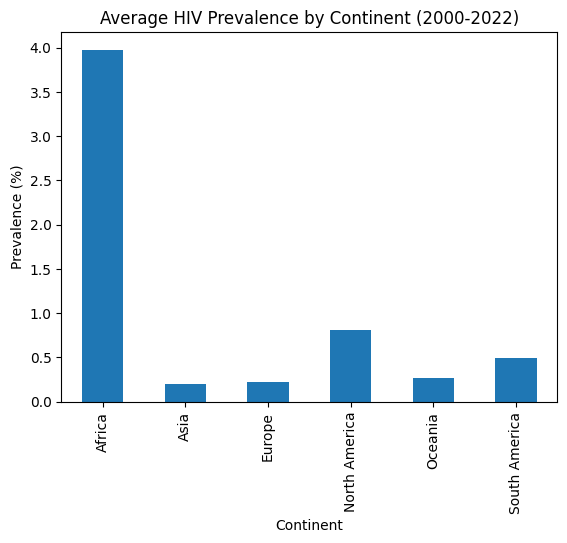

In [287]:
avg_prevalence_by_continent.plot(kind="bar")
plt.title("Average HIV Prevalence by Continent (2000-2022)")
plt.xlabel("Continent")
plt.ylabel("Prevalence (%)")
plt.show()

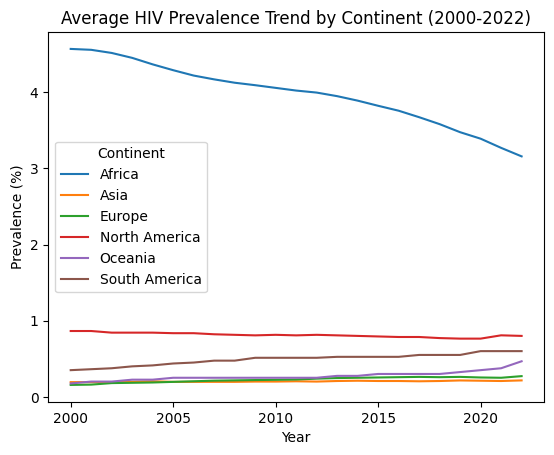

In [288]:
avg_prevalence_by_year_continent.plot()
plt.title("Average HIV Prevalence Trend by Continent (2000-2022)")
plt.xlabel("Year")
plt.ylabel("Prevalence (%)")
plt.legend(title="Continent")
plt.show()